<a href="https://colab.research.google.com/github/dadacoding/ML_practice/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

※ 출처 : 이수안컴퓨터연구소 채널 (https://www.youtube.com/watch?v=YEt0ViG_VXk)

**결정 트리 (Decision Tree)**


*   분류와 회귀에 사용되는 지도 학습 방법
*   데이터 특성으로부터 추론된 결정 규칙을 통해 값을 예측
*   if-then-else 결정 규칙을 통해 데이터 학습
*   트리의 깊이가 깊을수록 복잡한 모델
*   결정트리 장점
  *   이해와 해석이 쉽다
  *   시각화가 용이하다
  *   많은 데이터 전처리가 필요하지 않다
  *   수치형과 범주형 데이터 모두를 다룰 수 있다

In [1]:
# 필요한 라이브러리 가져오기
import pandas as pd
import numpy as np
import graphviz         # 트리 그리기 위해 
import multiprocessing  #
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [2]:
# 필요한 데이터셋 불러오기 / 모듈 불러오기

from sklearn.datasets import load_iris, load_wine, load_breast_cancer  # 분류문제 대표적인 데이터셋
from sklearn.datasets import load_boston, load_diabetes                # 회귀문제 대표적인 데이터셋

from sklearn import tree    # tree라는 이름으로 모듈이 되어있다
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor  # 분류, 회귀
from sklearn.preprocessing import StandardScaler   # @ 결정트리에서는 효과가 없지 않나..?
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# 분류를 위한 데이터

# 붓꽃 데이터

In [3]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 와인 데이터

In [4]:
wine = load_wine()

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# 유방암 데이터

In [5]:
cancer = load_breast_cancer()

cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# 회귀를 위한 데이터

# 보스턴 주택 가격 데이터

In [6]:
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()

boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['TARGET'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# 당뇨병 데이터

In [7]:
diabetes = load_diabetes()

diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['TARGET'] = diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


---

# 분류 - DecisionTreeClassifier()


*   DecisionTreeClassifier는 분류를 위한 결정트리 모델
*   두개의 배열 X,y를 입력 받음[링크 텍스트](https://)
    * X > [n_samples,n_features] 크기의 데이터 특성 배열
    * y > [n_samples] 크기의 정답 배열

In [8]:
X = [[0,0], [1,1]]
y = [0,1]

model = tree.DecisionTreeClassifier()
model = model.fit(X,y)

In [9]:
model.predict([[2., 2.]])    # 2.0 , 2.0 일때 predict 해라 / 2,2라는 데이터를 주었을 때 어떤 클래스가 선택되나? > 1

array([1])

In [10]:
model.predict_proba([[2., 2.]]) # 확률을 결과로 주는 것 / 2,2를 넣었을 때 확률적으로 0,1에 가까움 > 1이 선택됨

array([[0., 1.]])

---
# 붗꽃 데이터 학습


## 교차검증

### 전처리 없이 학습

In [11]:
model = DecisionTreeClassifier()

cross_val_score(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)  # >> 결과 좋은 성능으로 나옴

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

### 전처리 후 학습


*   결정트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

In [12]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [13]:
cross_val_score(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)  # >> 전처리 한것과 안한것이 차이가 없는 걸 확인할 수 있다.

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

---
# 학습된 결정 트리 시각화


In [14]:
model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier()

### 텍스트를 통한 시각화

In [15]:
r = tree.export_text(decision_tree=model,
                     feature_names=iris.feature_names)
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

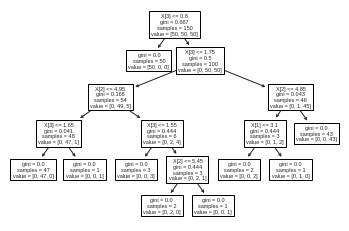

In [16]:
# plot_tree를 사용한 시각화
tree.plot_tree(model)  # 트리형태로 이미지로 출력 가능

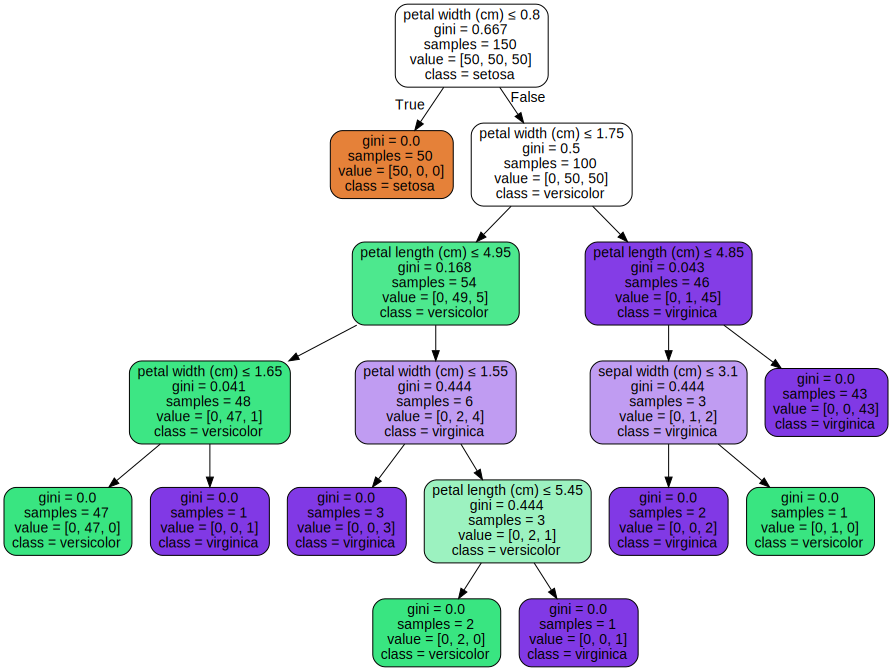

In [17]:
# graphviz를 사용한 시각화
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

## 시각화

In [18]:
# 시각화 옵션 주기
n_classes = 3
plot_colors = 'ryb'  # red, yellow, blue
plot_step = 0.02

(0.0, 7.88, -0.9, 3.4800000000000044)

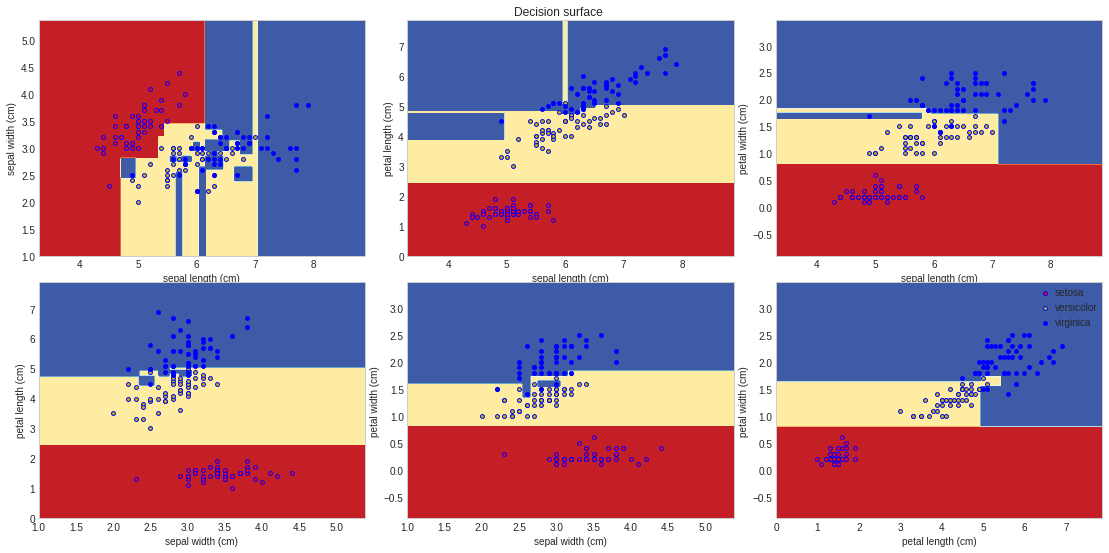

In [19]:
# 결정 경계 시각화

plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
  X = iris.data[:, pair]
  y = iris.target

  model = DecisionTreeClassifier()
  model = model.fit(X,y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
  y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  
  plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decision surface")
plt.legend(loc='lover right', borderpad=0, handletextpad=0)
plt.axis('tight')

# 결정경계에 따라서 트리가 모양을 갖추고 있는 걸 확인할 수 있다

(0.0, 7.88, -0.9, 3.4800000000000044)

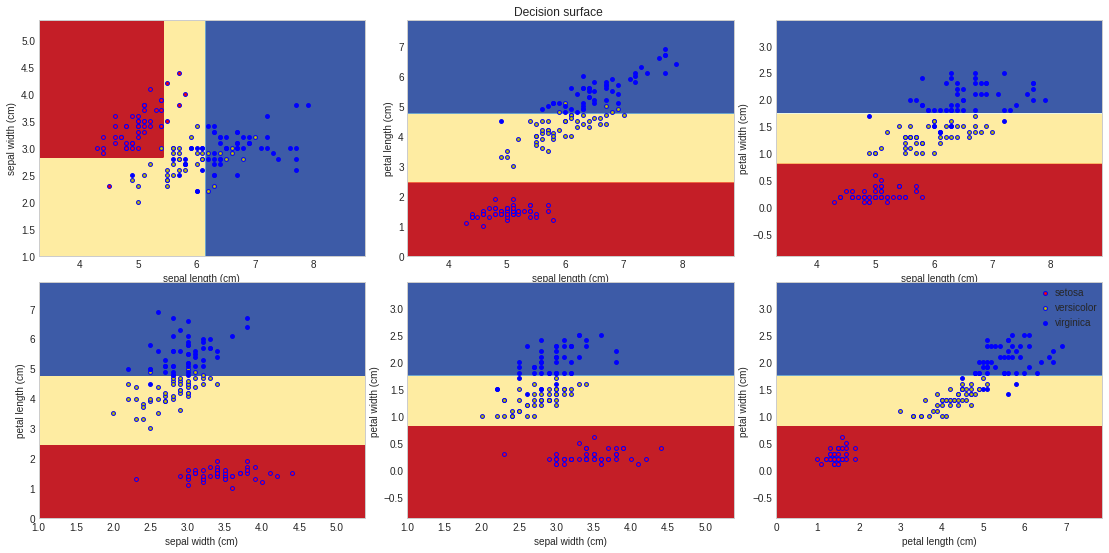

In [20]:
# 하이퍼파라미터를 변경해보면서 결정 경계의 변화 확인

plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
  X = iris.data[:, pair]
  y = iris.target

  model = DecisionTreeClassifier(max_depth=2)  # max_depth=2 추가 > 오버피팅 줄이기 위해 조절가능함
  model = model.fit(X,y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
  y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  
  plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decision surface")
plt.legend(loc='lover right', borderpad=0, handletextpad=0)
plt.axis('tight')

---

# 와인 데이터 학습

## 교차 검증

In [21]:
# 전처리 없이 학습

model = DecisionTreeClassifier()

cross_val_score(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.94444444, 0.80555556, 0.97222222, 0.91428571, 0.85714286])

In [22]:
# 전처리 후 학습

model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

cross_val_score(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)
# 큰 차이가 없다 > 결정트리가 규칙으로 학습하기 때문

array([0.94444444, 0.77777778, 0.86111111, 0.91428571, 0.85714286])

## 학습된 결정 트리 시각화

In [23]:
model = DecisionTreeClassifier()
model.fit(wine.data, wine.target)

DecisionTreeClassifier()

In [24]:
# 텍스트를 통한 시각화

r = tree.export_text(decision_tree=model,
                     feature_names=wine.feature_names)
print(r)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- flavanoids <= 0.56
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  0.56
|   |   |   |   |--- class: 1
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- malic_acid <= 2.12
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- malic_acid >  2.12
|   |   |   |   |   |--- class: 0
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- color_intensity <= 3.61
|   |   |   |--- class: 1
|   |   |--- color_intensity >  3.61
|   |   |   |--- class: 2
|   |--- flavanoids >  2.17
|   |   |--- magnesium <= 135.

[Text(0.5657894736842105, 0.9166666666666666, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(0.34210526315789475, 0.75, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(0.21052631578947367, 0.5833333333333334, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(0.10526315789473684, 0.4166666666666667, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3157894736842105, 0.4166666666666667, 'X[6] <= 0.565\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3684210526315789, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.47368421052631576, 0.5833333333333334, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(0.42105

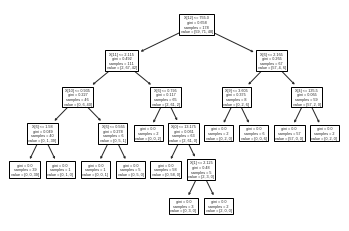

In [25]:
# plot_tree를 사용한 시각화
tree.plot_tree(model)

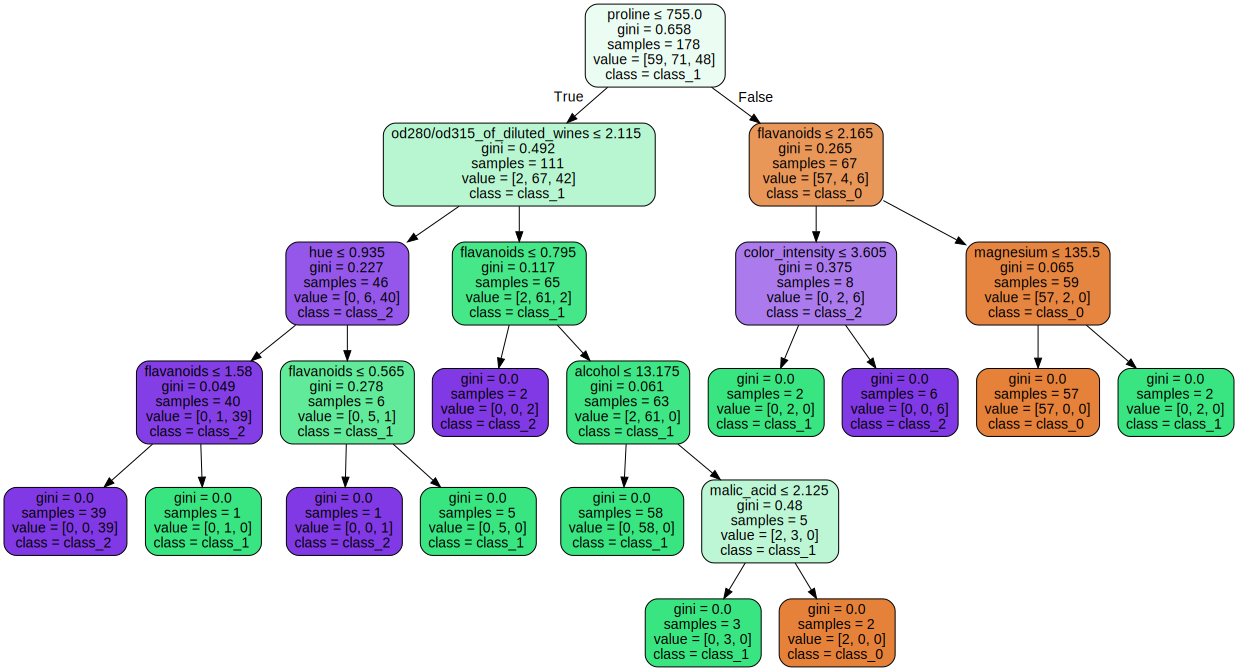

In [26]:
# graphviz를 사용한 시각화

dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names=wine.feature_names,
                                class_names=wine.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

---

# 시각화

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

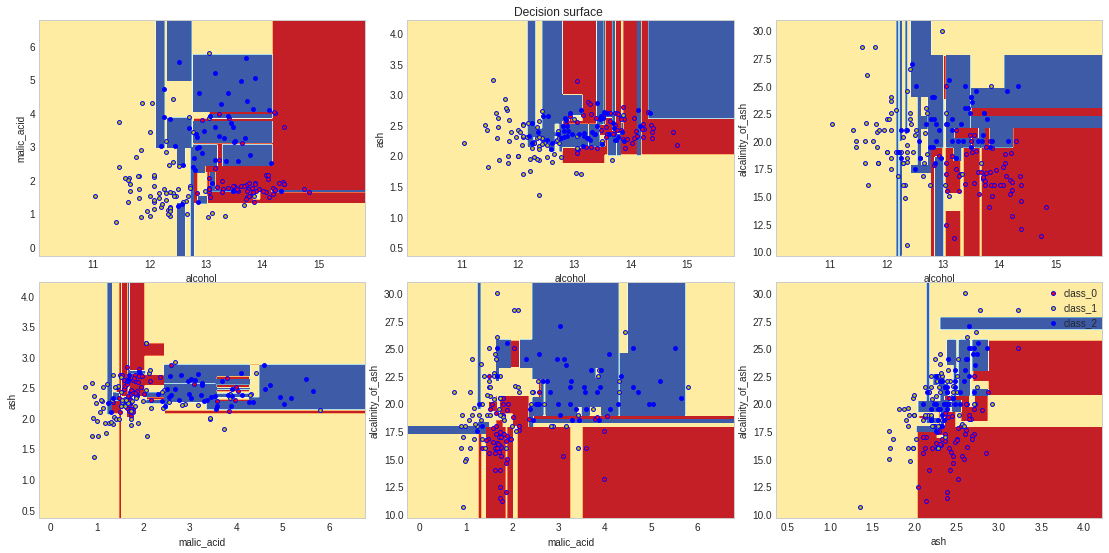

In [27]:
# 결정 경계 시각화

plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
  X = wine.data[:, pair]
  y = wine.target

  model = DecisionTreeClassifier()
  model = model.fit(X,y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
  y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  
  plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decision surface")
plt.legend(loc='lover right', borderpad=0, handletextpad=0)
plt.axis('tight')

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

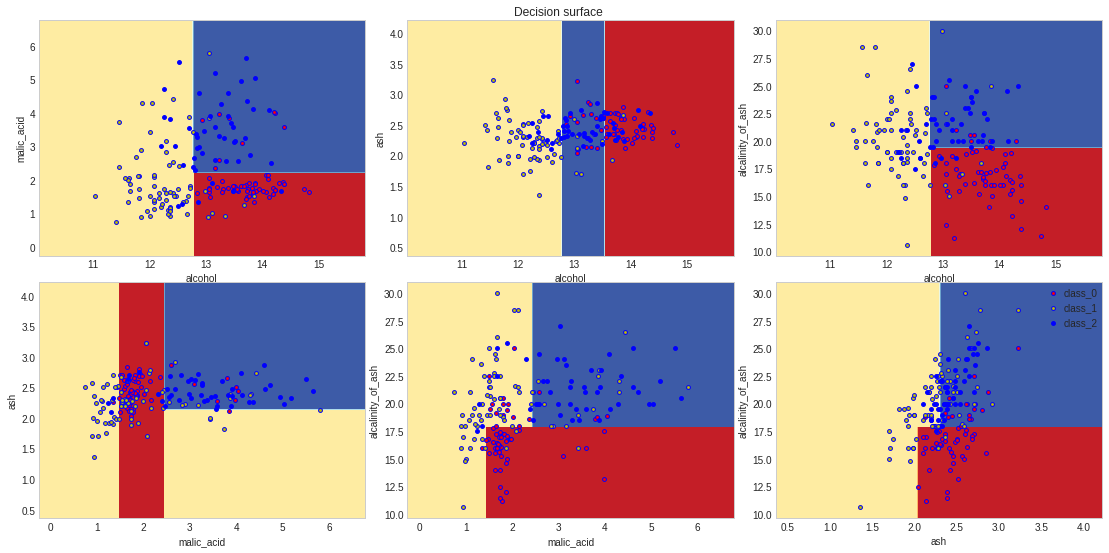

In [28]:
# 하이퍼파라미터를 변경해보면서 결정 경계의 변화 확인

plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
  X = wine.data[:, pair]
  y = wine.target

  model = DecisionTreeClassifier(max_depth=2)   # max_depth=2 추가
  model = model.fit(X,y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
  y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  
  plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decision surface")
plt.legend(loc='lover right', borderpad=0, handletextpad=0)
plt.axis('tight')

# 유방암 데이터 학습

## 교차 검증

In [29]:
# 전처리 없이 학습

model = DecisionTreeClassifier()

cross_val_score(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.9122807 , 0.9122807 , 0.92982456, 0.96491228, 0.89380531])

In [30]:
# 전처리 후 학습

model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

cross_val_score(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

# 역시 차이 크지 않다.

array([0.9122807 , 0.92982456, 0.92105263, 0.95614035, 0.91150442])

## 학습된 결정 트리 시각화

In [31]:
model = DecisionTreeClassifier()
model.fit(cancer.data, cancer.target)

DecisionTreeClassifier()

In [32]:
# 텍스트를 통한 시각화

r = tree.export_text(decision_tree=model)
print(r)

|--- feature_20 <= 16.80
|   |--- feature_27 <= 0.14
|   |   |--- feature_13 <= 91.56
|   |   |   |--- feature_13 <= 38.60
|   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |--- feature_19 <= 0.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_19 >  0.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_13 >  38.60
|   |   |   |   |--- feature_18 <= 0.02
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_18 >  0.02
|   |   |   |   |   |--- feature_27 <= 0.12
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_27 >  0.12
|   |   |   |   |   |   |--- class: 0
|   |   

[Text(0.625, 0.9375, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(0.40625, 0.8125, 'X[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(0.234375, 0.6875, 'X[13] <= 91.555\ngini = 0.03\nsamples = 333\nvalue = [5, 328]'),
 Text(0.203125, 0.5625, 'X[13] <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [4, 328]'),
 Text(0.125, 0.4375, 'X[14] <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [2, 317]'),
 Text(0.0625, 0.3125, 'X[19] <= 0.001\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.03125, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09375, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.1875, 0.3125, 'X[21] <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [1, 311]'),
 Text(0.15625, 0.1875, 'gini = 0.0\nsamples = 292\nvalue = [0, 292]'),
 Text(0.21875, 0.1875, 'X[21] <= 33.56\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.1875, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.0625, 'g

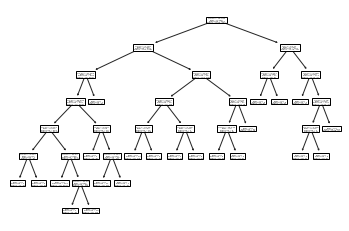

In [33]:
# plot_tree를 사용한 시각화

tree.plot_tree(model)

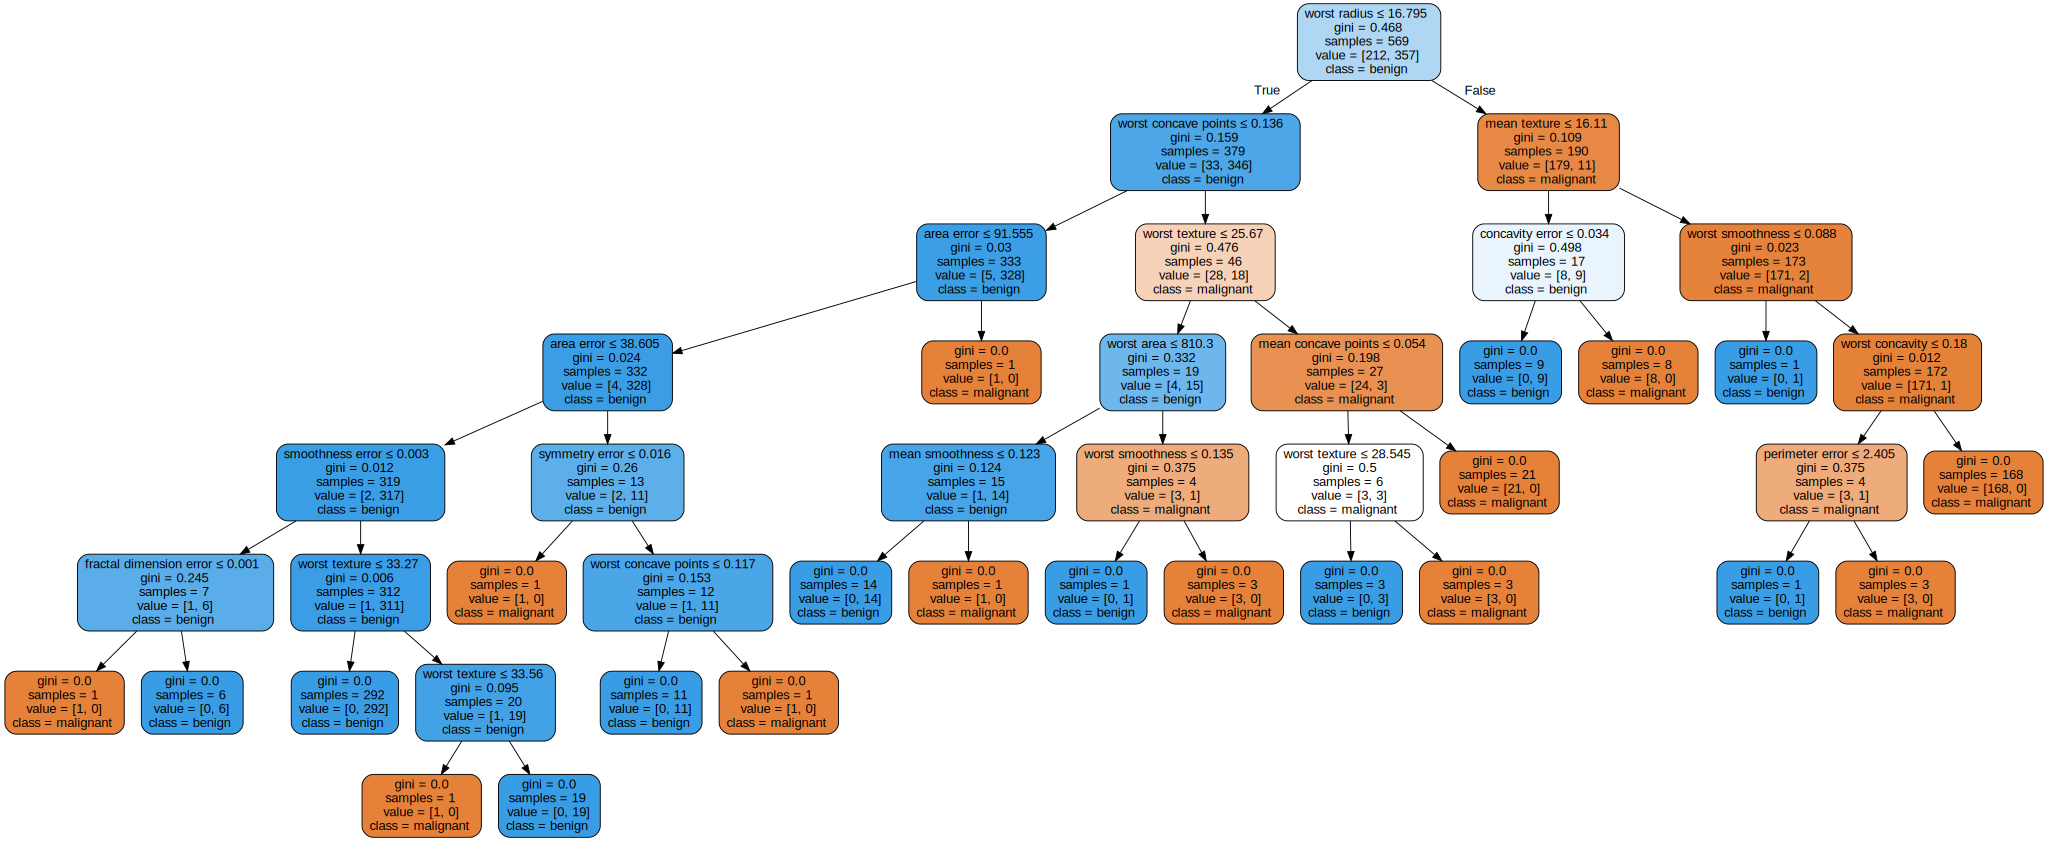

In [34]:
# graphviz를 사용한 시각화

dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names=cancer.feature_names,
                                class_names=cancer.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

## 시각화

In [35]:
n_classes = 2   # 악성이냐,양성이냐
plot_colors = 'ryb'
plot_step = 0.02

(5.981, 29.10099999999951, 142.5, 2501.980000001207)

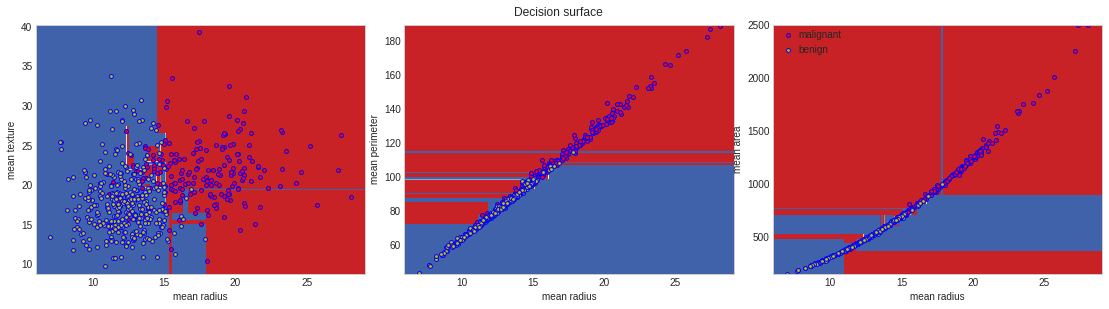

In [36]:
# 결정 경계 시각화

plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3]]):
  X = cancer.data[:, pair]
  y = cancer.target

  model = DecisionTreeClassifier()
  model = model.fit(X,y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
  y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  
  plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(cancer.feature_names[pair[0]])
  plt.ylabel(cancer.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decision surface")
plt.legend(loc='lover right', borderpad=0, handletextpad=0)
plt.axis('tight')

(5.981, 29.10099999999951, 142.5, 2501.980000001207)

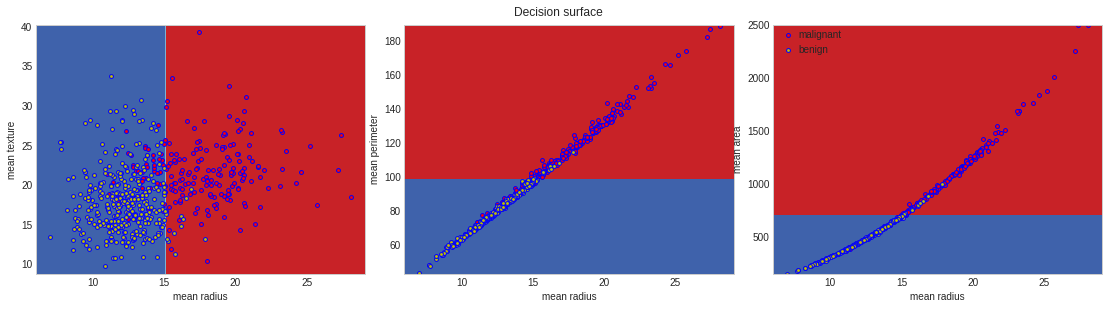

In [37]:
# 하이퍼파라미터를 변경해보면서 결정경계의 변화 확인

plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3]]):
  X = cancer.data[:, pair]
  y = cancer.target

  model = DecisionTreeClassifier(max_depth=2)   # max_depth=2 추가
  model = model.fit(X,y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
  y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  
  plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(cancer.feature_names[pair[0]])
  plt.ylabel(cancer.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decision surface")
plt.legend(loc='lover right', borderpad=0, handletextpad=0)
plt.axis('tight')

---
---
# 회귀 - DecisionTreeRegressor()

## 보스턴 주택 가격 데이터 학습

In [38]:
# 전처리 없이 학습

model = DecisionTreeRegressor()

cross_val_score(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([ 0.63034017,  0.60942007,  0.58218934,  0.3603583 , -1.7801424 ])

In [40]:
# 전처리 후 학습

model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

cross_val_score(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)
# 큰 차이 없다

array([ 0.61214049,  0.66847249,  0.63400909,  0.39130684, -1.84927497])

## 학습된 결정 트리 시각화

In [41]:
model = DecisionTreeRegressor()
model.fit(boston.data, boston.target)

DecisionTreeRegressor()

[Text(0.6728184390565702, 0.975, 'X[5] <= 6.941\nsquared_error = 84.42\nsamples = 506\nvalue = 22.533'),
 Text(0.4161865697639943, 0.925, 'X[12] <= 14.4\nsquared_error = 40.273\nsamples = 430\nvalue = 19.934'),
 Text(0.18499188359819735, 0.875, 'X[7] <= 1.385\nsquared_error = 26.009\nsamples = 255\nvalue = 23.35'),
 Text(0.10696972841555977, 0.825, 'X[11] <= 339.985\nsquared_error = 78.146\nsamples = 5\nvalue = 45.58'),
 Text(0.10507219520872865, 0.775, 'squared_error = 0.0\nsamples = 1\nvalue = 27.9'),
 Text(0.1088672616223909, 0.775, 'squared_error = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(0.2630140387808349, 0.825, 'X[5] <= 6.543\nsquared_error = 14.885\nsamples = 250\nvalue = 22.905'),
 Text(0.11266232803605312, 0.775, 'X[12] <= 7.57\nsquared_error = 8.39\nsamples = 195\nvalue = 21.63'),
 Text(0.041241698292220116, 0.725, 'X[9] <= 222.5\nsquared_error = 3.015\nsamples = 43\nvalue = 23.97'),
 Text(0.039344165085388995, 0.675, 'squared_error = 0.0\nsamples = 1\nvalue = 28.7'),
 Text(

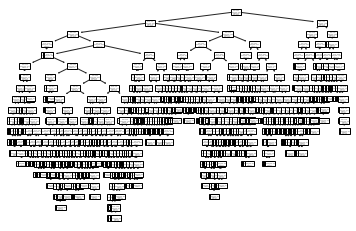

In [43]:
# plot_tree를 통한 시각화 > 과적합 알 수 있음

tree.plot_tree(model)

## 회귀식 시각화

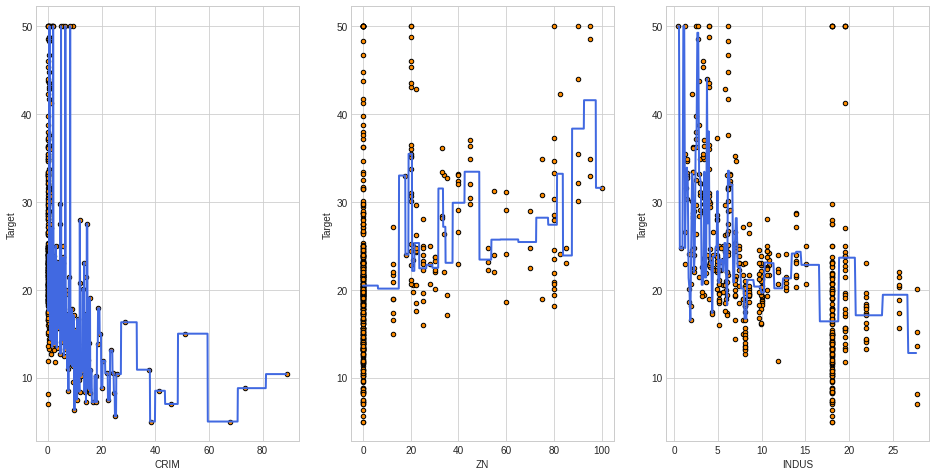

In [46]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0, 1, 2]):
  X = boston.data[:, pair].reshape(-1, 1)
  y = boston.target

  model = DecisionTreeRegressor()
  model.fit(X, y)

  X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
  predict = model.predict(X_test)

  plt.subplot(1, 3, pairidx + 1)
  plt.scatter(X, y, s=20, edgecolors='k',
              c='darkorange', label='data')
  
  plt.plot(X_test, predict, color='royalblue', linewidth=2)
  plt.xlabel(boston.feature_names[pair])
  plt.ylabel('Target')


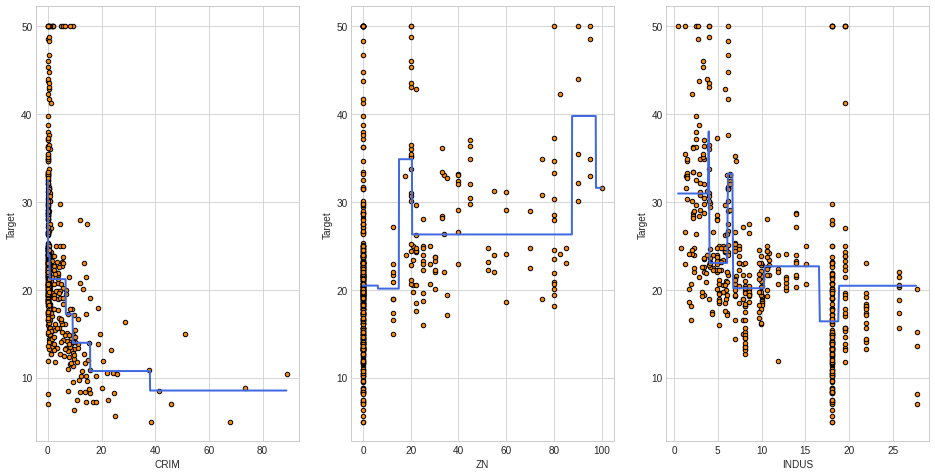

In [47]:
# 하이퍼파라미터를 변경해보면서 회귀식 시각화

plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0, 1, 2]):
  X = boston.data[:, pair].reshape(-1, 1)
  y = boston.target

  model = DecisionTreeRegressor(max_depth=3)   #max_depth=3 추가
  model.fit(X, y)

  X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
  predict = model.predict(X_test)

  plt.subplot(1, 3, pairidx + 1)
  plt.scatter(X, y, s=20, edgecolors='k',
              c='darkorange', label='data')
  
  plt.plot(X_test, predict, color='royalblue', linewidth=2)
  plt.xlabel(boston.feature_names[pair])
  plt.ylabel('Target')

---
## 당뇨병 데이터 학습



### 교차 검증

In [50]:
# 전처리 없이 학습

model = DecisionTreeRegressor()

cross_val_score(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)
# 결과 좋진 않다

array([-0.37513446, -0.19688044, -0.12118728,  0.1836578 , -0.28194091])

In [51]:
# 전처리 후 학습

model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

cross_val_score(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([-0.31995146,  0.01324272, -0.20207255, -0.10192399, -0.13885735])

## 학습된 결정 트리 시각화

In [52]:
model = DecisionTreeRegressor()
model.fit(diabetes.data, diabetes.target)

DecisionTreeRegressor()

In [53]:
# 텍스트를 통한 시각화
print(tree.export_text(model, feature_names=diabetes.feature_names))

|--- s5 <= -0.00
|   |--- bmi <= 0.01
|   |   |--- s3 <= 0.02
|   |   |   |--- s2 <= 0.09
|   |   |   |   |--- sex <= 0.00
|   |   |   |   |   |--- bp <= -0.03
|   |   |   |   |   |   |--- age <= -0.05
|   |   |   |   |   |   |   |--- bp <= -0.09
|   |   |   |   |   |   |   |   |--- value: [55.00]
|   |   |   |   |   |   |   |--- bp >  -0.09
|   |   |   |   |   |   |   |   |--- bp <= -0.05
|   |   |   |   |   |   |   |   |   |--- bp <= -0.07
|   |   |   |   |   |   |   |   |   |   |--- value: [200.00]
|   |   |   |   |   |   |   |   |   |--- bp >  -0.07
|   |   |   |   |   |   |   |   |   |   |--- s5 <= -0.02
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- s5 >  -0.02
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- bp >  -0.05
|   |   |   |   |   |   |   |   |   |--- s3 <= 0.01
|   |   |   |   |   |   |   |   |   |   |--- value: [134.00]
|   |   | 

In [ ]:
# plot_tree를 사용한 시각화
tree.plot_tree(model)  # 크게 나와서 패스

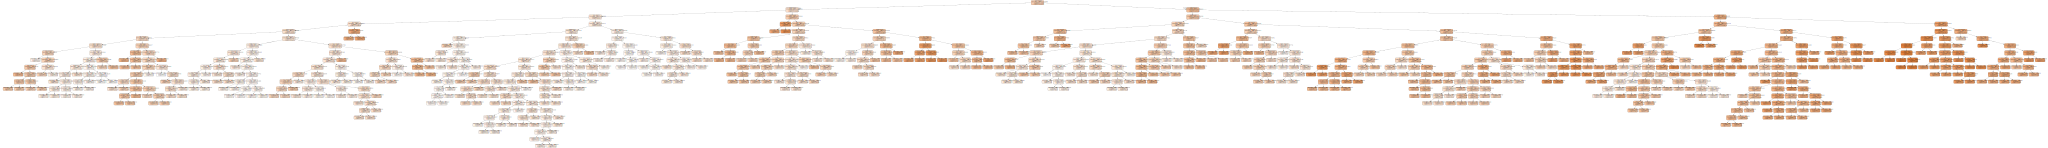

In [54]:
# graphviz를 사용한 시각화
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names=diabetes.feature_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

## 시각화

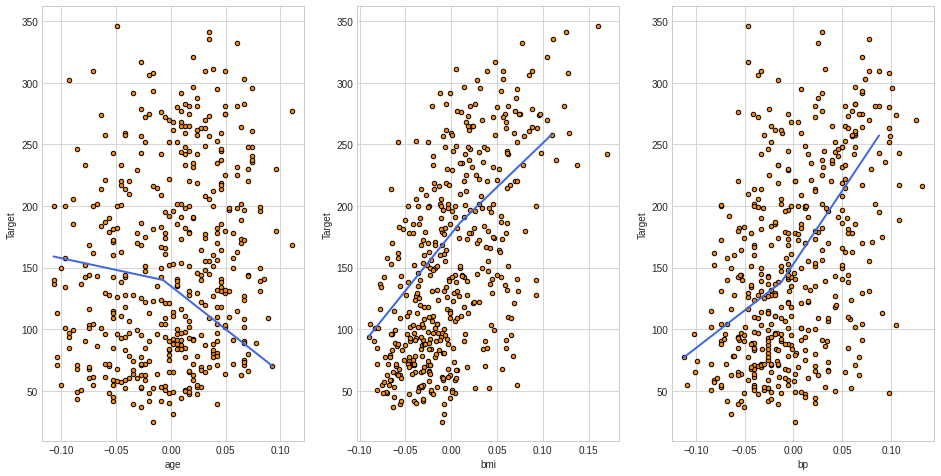

In [56]:
# 회귀식 시각화

plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0, 2, 3]):
  X = diabetes.data[:, pair].reshape(-1, 1)
  y = diabetes.target

  model = DecisionTreeRegressor()
  model.fit(X, y)

  X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
  predict = model.predict(X_test)

  plt.subplot(1, 3, pairidx + 1)
  plt.scatter(X, y, s=20, edgecolors='k',
              c='darkorange', label='data')
  
  plt.plot(X_test, predict, color='royalblue', linewidth=2)
  plt.xlabel(diabetes.feature_names[pair])
  plt.ylabel('Target')

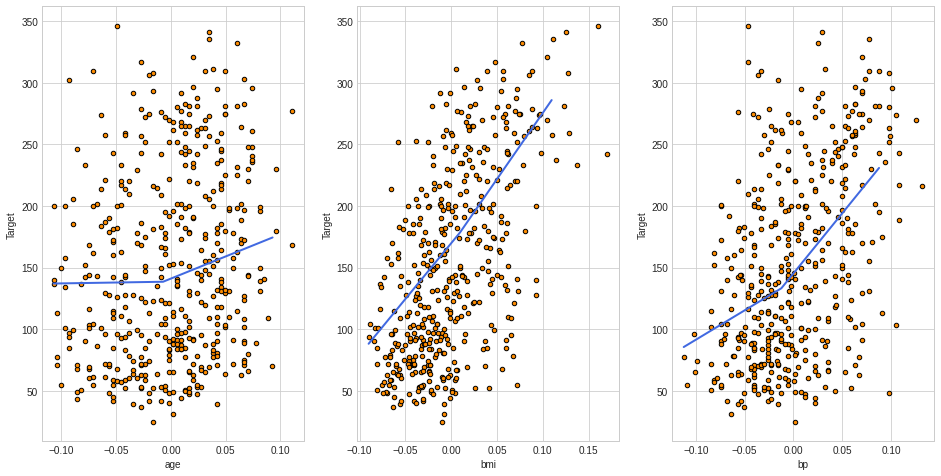

In [57]:
# 하이퍼파라미터를 변경해보면서 회귀식 시각화

plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0, 2, 3]):
  X = diabetes.data[:, pair].reshape(-1, 1)
  y = diabetes.target

  model = DecisionTreeRegressor(max_depth=3)  # max_depth=3 추가
  model.fit(X, y)

  X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
  predict = model.predict(X_test)

  plt.subplot(1, 3, pairidx + 1)
  plt.scatter(X, y, s=20, edgecolors='k',
              c='darkorange', label='data')
  
  plt.plot(X_test, predict, color='royalblue', linewidth=2)
  plt.xlabel(diabetes.feature_names[pair])
  plt.ylabel('Target')